<a href="https://colab.research.google.com/github/benedictlai/thinkful-challenges/blob/master/Benedict_Lai_Final_Capstone_Project_November_30%2C_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore")

# Introduction to my Final Project

What is the problem you are attempting to solve?

I am attempting to solve customer trends with Telco Company. For example, I want to solve if a customer is going to churn based on the tenure of the customer, the preferences for contracts and if they are a senior citizen. I mention senior citizens because they are used to paying bills through the mail and they may not be benefitting from getting a discount to keep them from staying with the company.

How is your solution valuable?

My solution is valuable because it will help determine if tenure customers are more likely to churn based on customer behavior such as the preferences for contracts, how long they have been a customer with Telco, and if they are a senior citizen. These factors may impact on customer retention. The results of my research will not only benefit Telco Company but it will also benefit other companies so it can inspire other customers to give true feedback to the company especially with the preferences of contracts.

What is your data source and how will you access it?

The data source is from https://www.kaggle.com/blastchar/telco-customer-churn. They are 7,044 customers in the dataset. I will not be using the whole data set because of some of the null values (TotalCharges) that may affect it.

What techniques from the course do you anticipate using?

I anticipate using Logistic Regression, Gradient Boosting & Random Forest Classifier, Support Vector Machine, Feature Importances.

What do you anticipate to be the biggest challenge you’ll face?

Getting the best accuracy rate on churn, cleaning messy data, handling the class imbalance are the biggest hurdles I'll face.

# Introducing Data

In [2]:
telco = pd.read_csv('https://raw.githubusercontent.com/benedictlai/thinkful-challenges/master/telco(7).csv')
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MCGroup,TCGroup
0,6260-XLACS,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,117.8,No,0-14,$0-$19.99,$0-$999.99
1,0661-KQHNK,Female,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.00,105.5,No,0-14,$0-$19.99,$0-$999.99
2,0895-LNKRC,Male,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,113.5,No,0-14,$0-$19.99,$0-$999.99
3,1015-JPFYW,Male,0,No,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,No,0-14,$0-$19.99,$0-$999.99
4,1226-JZNKR,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.80,160.05,No,0-14,$0-$19.99,$0-$999.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,70-75,$90-$119.99,$8500-$8999.99
7039,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No,70-75,$90-$119.99,$8500-$8999.99
7040,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.1,No,70-75,$90-$119.99,$8500-$8999.99
7041,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.4,No,70-75,$90-$119.99,$8500-$8999.99


# Data Information

Q1: Gender? - Categorical

Classes: Male or Female

Q2: SeniorCitizen? - Numerical 

Classes: 0 (no) or 1(Yes)

Q3: Partner - Categorical

Classes: Yes or No 

Q4: Dependents - Categorical

Classes: Yes or No 

Q5: tenure - Numerical

Classes: 1- 72

Q6: PhoneService - Categorical

Classes: Yes or No 

Q7: MultipleLines - Categorical

Classes: Yes, No, or No Phone Service

Q8: InternetService - Categorical

Classes: DSL, Fiber Optic, or No

Q9. OnlineSecurity - Categorical

Classes: Yes, No, or No Internet Service

Q10. OnlineBackup - Categorical

Classes: Yes, No, or No Internet Service

Q11. DeviceProtection - Categorical

Classes: Yes, No, or No Internet Service

Q12. TechSupport - Categorical 

Classes: Yes, No, or No Internet Service

Q13. StreamingTV - Categorical 

Classes: Yes, No, or No Internet Service

Q14. StreamingMovies - Categorical

Classes: Yes, No, or No Internet Service

Q15. Contract - Categorical

Classes: Month-to-Month, One Year, Two Year 

Q16. PaperlessBilling	- Categorical 

Classes: Yes or No  

Q17. PaymentMethod - Categorical

Classes: Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check

Q18. MonthlyCharges - Continuous

Classes: 18.25-118.75

Q19: TotalCharges - Continuous

Classes: 18.8-8684.8 

Q20. Churn - Categorical

Classes: Yes or No

I added three categories below to cluster them into groups in Excel since the data was all over the place for Tenure, MonthlyCharges, and TotalCharges.

Q21. TenureGroup - Continuous

Classes: 0-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74

Q22. MCGroup - Continuous

Classes: 0-19.99, 20-29.99, 30-39.99, 40-49.99, 50-59.99, 60-69.99, 70-79.99, 80-89.99, 90-119.99

Q23. TCGroup - Continuous

Classes: 0-999.99, 1000-1499.99, 1500-1999.99, 2000-2499.99, 2500-2999.99, 3000-3499.99, 3500-3999.99, 4000-4499.99, 4500-4999.99, 5000-5499.99, 5500-5999.99, 6000-6499.99, 6500-6999.99, 7000-7499.99, 7500-7999.99, 8000-8499.99, 8500-8999.99

I added this category to target variables, which is the main purpose of the project.

I got this data from Kaggle, which is from https://www.kaggle.com/blastchar/telco-customer-churn.



In [20]:
telco.dtypes

customerID          int64
gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
TenureGroup         int64
MCGroup             int64
TCGroup             int64
dtype: object

In [0]:
telco.dropna(subset=['TCGroup'], inplace=True)

In [22]:
telco.isnull().sum().sort_values(ascending=False)

TCGroup             0
MCGroup             0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
TenureGroup         0
customerID          0
dtype: int64

# Data Analysis

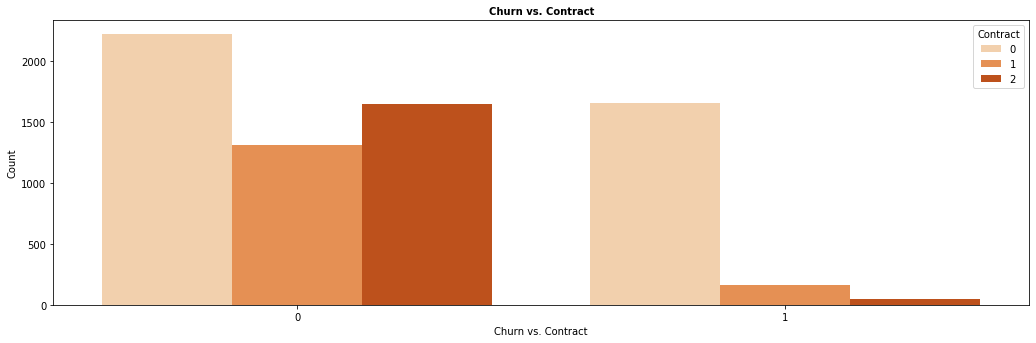

In [23]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="Contract", palette="Oranges",data=telco)
plt.title("Churn vs. Contract",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Contract")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More customers are more likely to not recommend the company with a month-to-month contract based on those who voted "Yes" to churn. A reason those types of customers only can to month-to-month contract is that they have a limited budget that prevents them from doing yearly contracts. Those types of customers may experience late fees for not paying on time, which inflates their decision to not recommend the company when the company is not at fault.

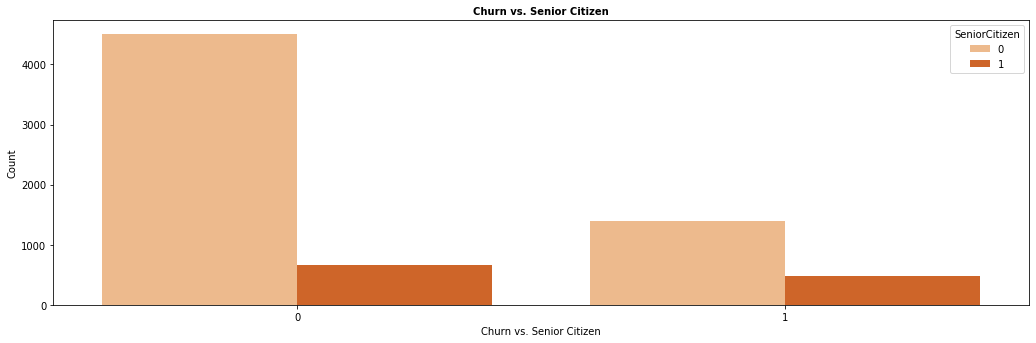

In [24]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="SeniorCitizen", palette="Oranges",data=telco)
plt.title("Churn vs. Senior Citizen",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Senior Citizen")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Senior citizens are less likely to churn because there is an implication they receive a discount on services. Another implication may not be the discount, but their loyalty to the company (which causes them to have more incentives for them being with the company long). I predicted senior citizens were going to churn from the company because companies now emphasize on paperless billing. In the graph below, senior citizens did not sign up for paperless billing, which meant they are used to paying bills by mail.

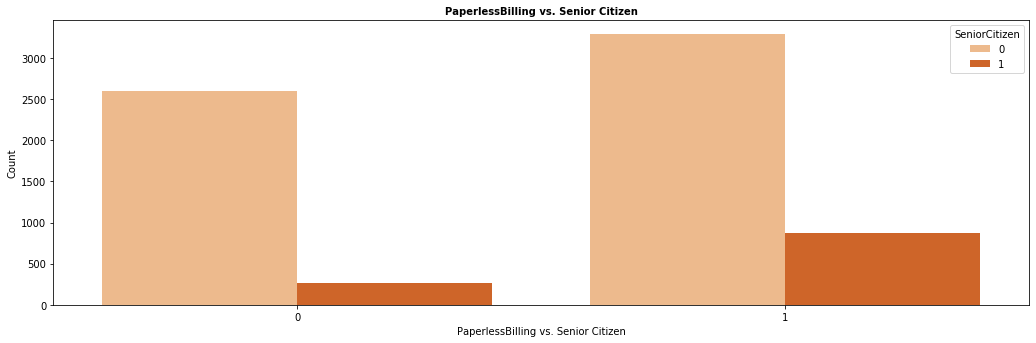

In [25]:
plt.figure(figsize=(10,5))
sns.countplot("PaperlessBilling", hue="SeniorCitizen", palette="Oranges",data=telco)
plt.title("PaperlessBilling vs. Senior Citizen",fontsize=10,fontweight="bold")
plt.xlabel("PaperlessBilling vs. Senior Citizen")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

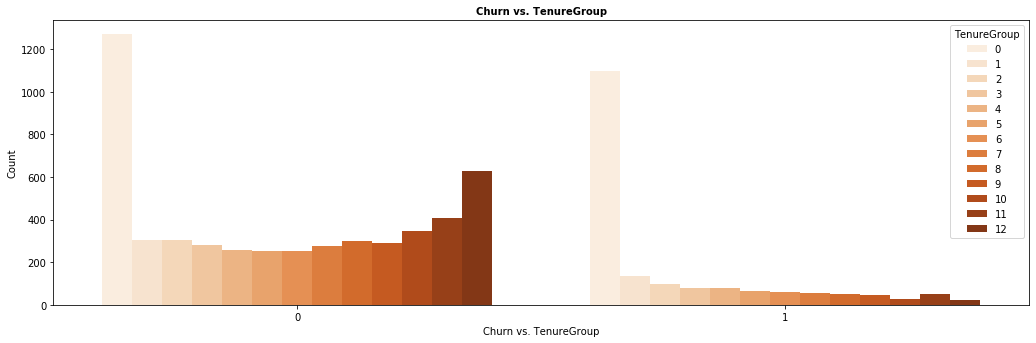

In [26]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="TenureGroup", palette="Oranges",data=telco)
plt.title("Churn vs. TenureGroup",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. TenureGroup")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Customers who have been with the company longer are less likely to churn because there is an implication they receive a special discount for staying with the company for a while. Those customers who have stayed with the company for less than 15 years did not recommend the company and did not show enough patience to stay longer with the company.




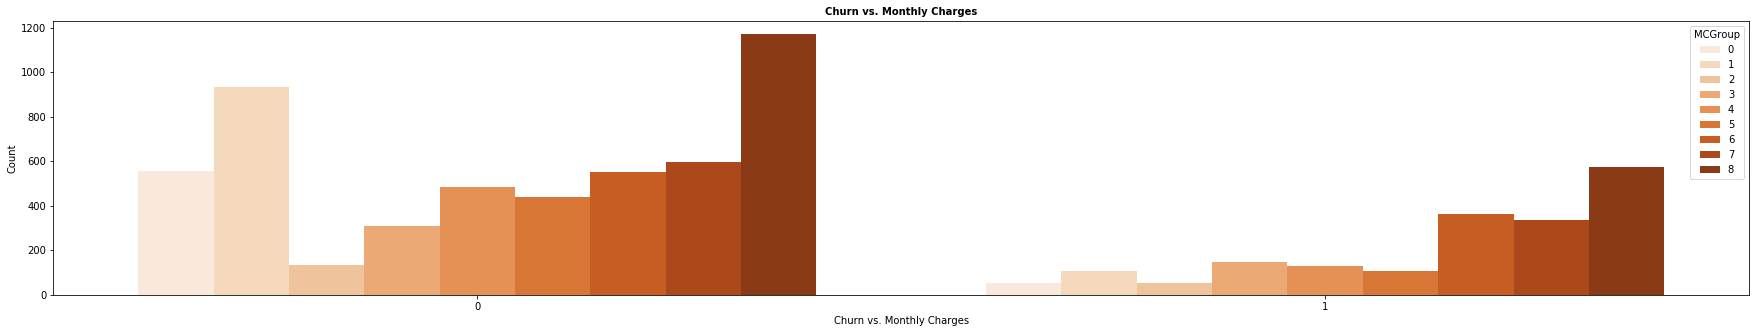

In [27]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="MCGroup", palette="Oranges",data=telco)
plt.title("Churn vs. Monthly Charges",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Monthly Charges")
plt.ylabel("Count")
plt.subplots_adjust(top=2.35, bottom=1.59, right=2.48)
plt.show()

Customers who paid `$70/month` are most likely to churn due to the expensive services offered. Those who paid less than $30 are satisfied with the services, which implicates they still recommended the service.

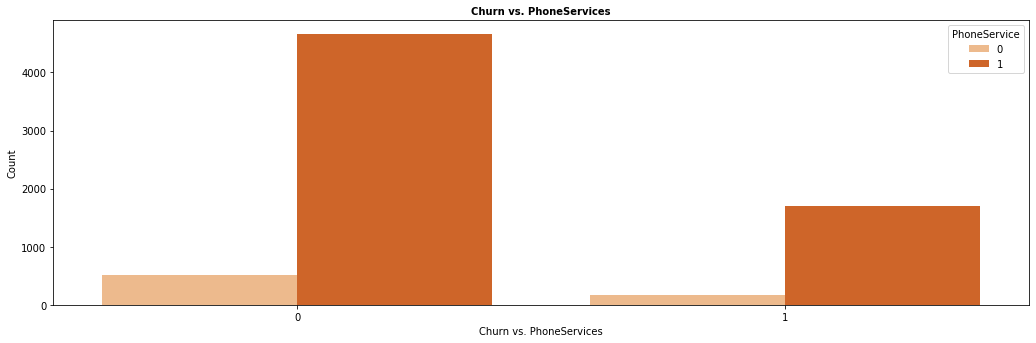

In [28]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="PhoneService", palette="Oranges",data=telco)
plt.title("Churn vs. PhoneServices",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. PhoneServices")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More customers (who churned) voted yes to having phone service. Those churned customers that had phone service were unlikely satisfied with their services based on quality, and/or price.

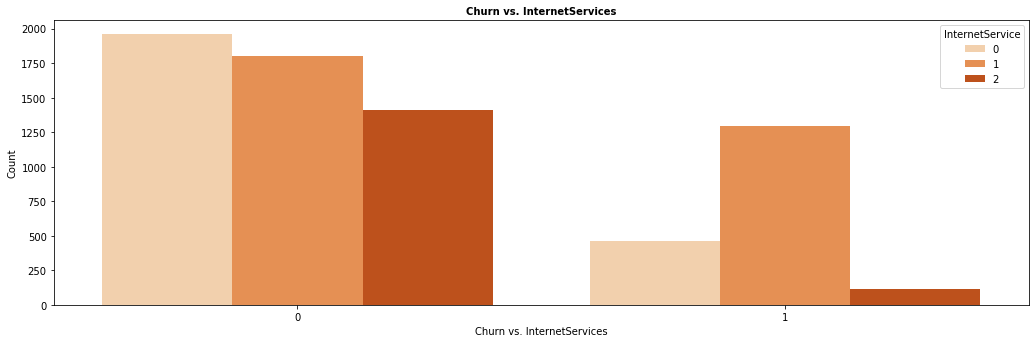

In [29]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="InternetService", palette="Oranges",data=telco)
plt.title("Churn vs. InternetServices",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. InternetServices")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Those churned customers are the ones who use Fiber Optic. Because Fiber Optic is faster than DSL, it is an implication that it is more expensive.

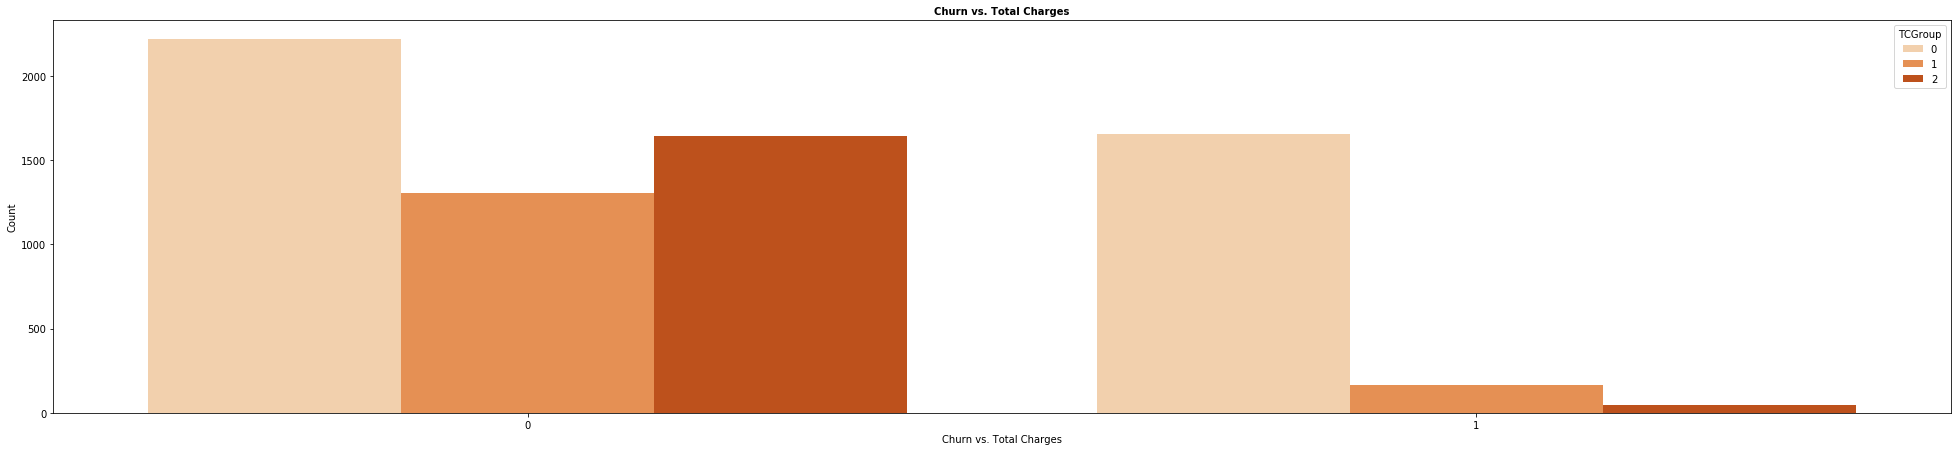

In [30]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="TCGroup", palette="Oranges",data=telco)
plt.title("Churn vs. Total Charges",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Total Charges")
plt.ylabel("Count")
plt.subplots_adjust(top=4.88, bottom=3.79, right=2.76)
plt.show()

Those churned customers are theones that paid a total of $1,000 month. The more they paid in total, they less of a chance they would churn the company.

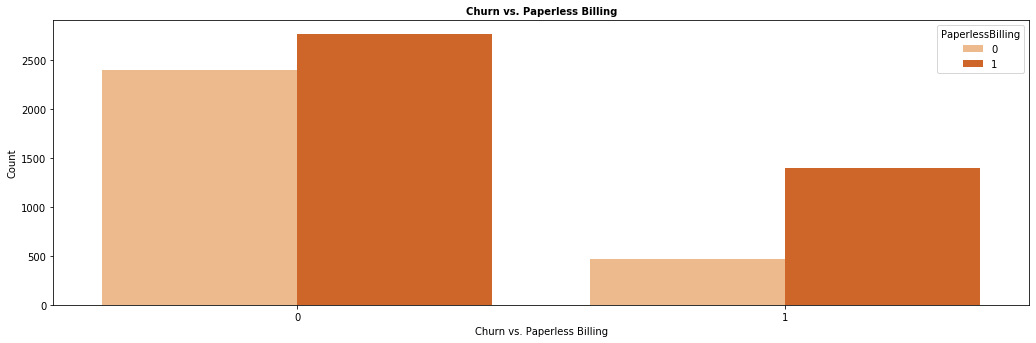

In [31]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="PaperlessBilling", palette="Oranges",data=telco)
plt.title("Churn vs. Paperless Billing",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Paperless Billing")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Those who did churn actually did vote for paperless billing as their preference. What I learned from it is that not choosing paperless billing does not always play in a factor of a customer churning.

---



In [0]:
lb = LabelEncoder()

for col in telco.columns:
  telco[col]=lb.fit_transform(telco[col])

In [33]:
telco.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MCGroup,TCGroup
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370,4.531592,4.816555,0.690473
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561,4.427614,2.824181,0.833755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000,0.000000,2.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000,3.000000,6.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000,9.000000,7.000000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000,12.000000,8.000000,2.000000


In [0]:
X= telco[['Contract', 'SeniorCitizen', 'TenureGroup','MCGroup','PhoneService','InternetService','TCGroup','PaperlessBilling']]
y= telco['Churn']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [36]:
import timeit

%timeit pass

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("\n")
print("The Logistic Regression results are below:")
print("Accuracy:",lr_acc_score*100)
print("F1:",f1_score(y_test, lr_predict, average="macro")*100)
print("Precision:",precision_score(y_test,lr_predict, average="macro")*100)
print("Recall:",recall_score(y_test, lr_predict, average="macro")*100) 
print("Cross Validation:", cross_val_score(lr, X_train, y_train, cv=3)*100)
print("\n")

print("Here is the confusion matrix below:\n",lr_conf_matrix)

100000000 loops, best of 3: 7.54 ns per loop


The Logistic Regression results are below:
Accuracy: 79.08187411263606
F1: 71.66604777368418
Precision: 73.59812103906592
Recall: 70.46565701356438
Cross Validation: [79.07542579 79.0626902  77.90626902]


Here is the confusion matrix below:
 [[1376  167]
 [ 275  295]]


In [37]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.54 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.16422148603881
F1: 73.93137011779294
Precision: 77.00831847890672
Recall: 72.22334026901342
Cross Validation: [78.89294404 78.75836884 78.51491175]


Here is the confusion matrix below:
 [[1414  129]
 [ 269  301]]


In [38]:
%timeit pass

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print('\n')
print("The Random Forest Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_rfc )*100)
print("F1:",f1_score(y_test,pred_rfc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_rfc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_rfc, average="macro")*100) 
print("Cross Validation:", cross_val_score(rfc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_rfc))

100000000 loops, best of 3: 7.54 ns per loop


The Random Forest Classifier results are below:
Accuracy: 78.98722195929957
F1: 72.14916759683663
Precision: 73.34214844295491
Recall: 71.28588645950586
Cross Validation: [77.37226277 76.44552648 75.47169811]


Here is the confusion matrix below:
 [[1358  185]
 [ 259  311]]


In [39]:

%timeit pass

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print('\n')
print("The Support Vector Machine (Classifier) results are below:")
print("Accuracy:",accuracy_score(y_test,pred_svc )*100)
print("F1:",f1_score(y_test, pred_svc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_svc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_svc, average="macro")*100) 
print("Cross Validation:", cross_val_score(svc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_svc))

100000000 loops, best of 3: 7.54 ns per loop


The Support Vector Machine (Classifier) results are below:
Accuracy: 79.9810695693327
F1: 71.76141305566938
Precision: 75.49337570559982
Recall: 69.97504292162682
Cross Validation: [79.31873479 78.51491175 78.63664029]


Here is the confusion matrix below:
 [[1415  128]
 [ 295  275]]


# Unit 5 Specialization



# Which gender of tenured customers more likely to churn?

0 is Female and 1 is Male



In [40]:
print('1 year at Telco Company')
telco1 = telco.loc[telco['tenure'] == 1]
telco1 = telco1.groupby(telco1['gender'])['Churn'].mean()
print(telco1)
print(stats.kstest(telco1, 'norm'))
print('\n')

print('2 years at Telco Company')
telco2 = telco.loc[telco['tenure'] == 2]
telco2 = telco2.groupby(telco2['gender'])['Churn'].mean()
print(telco2)
print(stats.kstest(telco2, 'norm'))
print('\n')

print('3 years at Telco Company')
telco3 = telco.loc[telco['tenure'] == 3]
telco3= telco3.groupby(telco3['gender'])['Churn'].mean()
print(telco3)
print(stats.kstest(telco3, 'norm'))
print('\n')

print('4 years at Telco Company')
telco4 = telco.loc[telco['tenure'] == 4]
telco4= telco4.groupby(telco4['gender'])['Churn'].mean()
print(telco4)
print(stats.kstest(telco4, 'norm'))
print('\n')

1 year at Telco Company
gender
0    0.654930
1    0.589666
Name: Churn, dtype: float64
KstestResult(statistic=0.7222925868319272, pvalue=0.15424281465700537)


2 years at Telco Company
gender
0    0.523077
1    0.509259
Name: Churn, dtype: float64
KstestResult(statistic=0.6947147446423894, pvalue=0.18639817427752306)


3 years at Telco Company
gender
0    0.495050
1    0.444444
Name: Churn, dtype: float64
KstestResult(statistic=0.6716393567181147, pvalue=0.21564142411298706)


4 years at Telco Company
gender
0    0.534091
1    0.409091
Name: Churn, dtype: float64
KstestResult(statistic=0.6587635262502591, pvalue=0.23288466203431518)




I chose tenured customers because they are relevant to the data set with churning. I broke down by each gender and it seems that more females as a Telco customer are more likely to churn. This indicates more females are likely to call out every mistake on a bill. Also, those type of customers are savvy, meaning they wanted a cheaper service since the service did not live up to quality. 

Also, for the customers that were with Telco for the first 2 years, new customers may not have seniority and get special treatment on certain services like the tenured customers.

Because the p-values in all tenured customer groups are higher than 0.05 for tenure vs. churning, we cannot reject the null hypothesis. Therefore, the relationship between tenure and churning does not correlate well. However, as the tenured customers got younger, the p-value kept going lower.


# Which gender of senior citizens more likely to churn?


In [41]:
telcosc1 = telco.loc[telco['SeniorCitizen'] == 1]
telcosc1 = telcosc1.groupby(telcosc1['gender'])['Churn'].mean()
print(telcosc1)
print(stats.kstest(telcosc1, 'norm'))

gender
0    0.422535
1    0.411150
Name: Churn, dtype: float64
KstestResult(statistic=0.6595186617539919, pvalue=0.2318550833875852)


I chose senior citizen because they are relevant to the data set with churning. With the increase of paying bills online electronically, I figured this type of demographic will likely churn since they have yet to transition into the new technology era.

I broke down by each gender and it seems more female senior citizens are likely to churn Telco Company. Similar to my previous question in Unit 5, this indicates more females are likely to call out every mistake on a bill. Also, those type of customers are savvy, meaning they wanted a cheaper service since the service did not live up to quality. 

Because the p-value is higher than 0.05 for senior citizens vs. churning, we cannot reject the null hypothesis. Therefore, the relationship between senior citizens and churning do not correlate well.



*Describe your model in detail: why you chose it, why it works, what problem it solves, how it will run in a production like environment. What would you need to do to maintain it going forward?*

I chose Logistic Regression because it is straightforward to use and easy to train. 

I chose Gradient Boosting because of the decision trees that can predict which variables has the most popularity with each of the questions. Also, it handles null values, which may be the most useful model for my dataset. 

I chose Random Forest because it is faster to produce results. 

Also, my data is not all balanced so this feature is efficient to use. I chose Support Vector Classifier due to its flexibility for datasets.

Gradient Boosting, Random Forest, Support Vector Classifier, and Logistic Regression are the models I chose for this based on the lessons I read. I checked on all those 4 models to determine which model would fit accurately with my model.

Random Forest Classifier has the lowest accuracy score of 78.99% and the lowest overall for cross-validation scores. Logistic Regression has the second lowest accuracy score of 79.08% and the second lowest for cross-validation scores. Support Vector Machine has the second highest accuracy score with 79.98%, but it ranked 1st in cross-validation scores. Gradient Boosting has the highest accuracy score of 81.16%, but it ranked 2nd in cross-validation scores.  Therefore, The cross-validation scores is inconsistent with the four models I used in terms of ranking. 

The models work because of the consistent scores among the models and higher than expected scores. The problem that it helped determine if tenure customers are more likely to churn based on customer behavior such as the preferences for contracts, how long they have been a customer with Telco, and how much they pay monthly and in total charges. These factors may impact on customer retention. The results of my research will not only benefit Telco Company but it will also benefit other companies so it can inspire other customers to give true feedback to the company especially with the preferences of contracts.

What I would need to do to maintain it going forward is to test out one more model (which is Feature Importances) to determine which variables are the most relevant.

*What do the metrics you present (ie, Precision, Recall, Accuracy) mean in terms of the goals you set out for this project?*

The best model is Gradient Boosting. 77.01% of precision means it is the ratio of accurately predicted positive observations out of the overall observations (True Positive divided by True Positive + False Positive). For Recall (sensitivity), 72.22% is the ratio of the accurately predicted positive observations out of the overall observations in the actual class *labeled* (True Positive divided by True Positive + False Negative). The recall score is lower because there are more false negative observations in the dataset. 81.16% of accuracy means (True Positive + True Negative)/(True Positive + False Positive + False Negative + True Negative)). This is the highest out of the three because there are more true negative observations.

For *model tuning*, I will be presenting *4 different version of models* by changing a few variables to see which version works based on the improvement for **Gradient Boosting Models**.
1



# Model Tuning - Gradient Boosting Classifier


In [42]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.52 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.16422148603881
F1: 73.93137011779294
Precision: 77.00831847890672
Recall: 72.22334026901342
Cross Validation: [78.89294404 78.75836884 78.51491175]


Here is the confusion matrix below:
 [[1414  129]
 [ 269  301]]


# Version A - I will reduce the estimators to 50 and increase the max depth to 4.


In [47]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=50, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier for Version A results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.53 ns per loop


The Gradient Boosting Classifier for Version A results are below:
Accuracy: 81.21154756270705
F1: 74.5673998270054
Precision: 76.7048890634204
Recall: 73.19609782719924
Cross Validation: [79.13625304 79.00182593 78.21059038]


Here is the confusion matrix below:
 [[1398  145]
 [ 252  318]]


For the accuracy, F1, and recall scores, they improved by 0.04733, 0.6537, and 0.973, respectively.

However, the precision score went down by 0.3034. An implication of this is reducing the estimators dramatically made have played a part in this unusual trend. Also, the true positives (down by 16 to 1398) went in the wrong direction.

Despite the negativity on the precision, the cross validation scores went up in the first two columns (up by 0.2433 and 0.2435, respectively) even though the third row column trended down by 0.3043.

On the bright side, increasing the max depth to 4 did help improve the model in Version A compared to the original model and the false negatives did reduce by 17 (from 269 to 252).

For the next model (Version B), I will test if increasing the estimators back to 100, which I hope will help my model better.



# Version B - I will keep the max depth at 4 and increase the estimators back to 100.



In [44]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier for Version B results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.54 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.44817794604828
F1: 74.80502162100339
Precision: 77.10286415388066
Recall: 73.35811986219599
Cross Validation: [78.77128954 77.23676202 77.90626902]


Here is the confusion matrix below:
 [[1403  140]
 [ 252  318]]


For the accuracy, F1, precision, and recall scores, they improved by 0.2366, 0.2376, 0.398, and 0.1621, respectively compared to Version A.

For true positive it went up by 5 (from 1398 to 1403) vs. Version A. For false negatives, they stayed low at 252 vs. 269 from the original model.

However, the cross-validation scores trended down from Version A (down by 0.3650, 1.7651, 0.3043, respectively). Still, this model has more pros than cons vs. Version A.

For the next model (Version C), I will test if increasing the estimators up to 150 will help my model better.


# Version C - I will keep the max depth at 4 and increase the estimators to 150.




In [48]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=150, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results for Version C are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.52 ns per loop


The Gradient Boosting Classifier results for Version C are below:
Accuracy: 81.02224325603407
F1: 74.44453995297964
Precision: 76.35760852980805
Recall: 73.17710998169436
Cross Validation: [79.01459854 77.60194766 77.90626902]


Here is the confusion matrix below:
 [[1392  151]
 [ 250  320]]


Despite increasing the estimators up to 150, the scores went down in all categories.

For the accuracy, F1, precision, and recall scores, they declined by 0.4258, 0.3605, 0.7453, and 0.181, respectively. Also, true positives (down 11 to 1392) went in the wrong direction.

The only bright side of this model is that at least the false negative hit its lowest point yet (went from 252 to 250) and the cross-validation scores did go up (+0.1825, +0.3652, no change, respectively) vs. Version B.

An assumption of the model not meeting my high expectations is where I went over a certain limit where I cannot make the estimators too high. Increasing the estimators higher than 150 may cause the model to perform worse than the original model.

Therefore, I will test if increasing the estimators down to 125 will help the next model (Version D) better.



# Version D - I will keep the max depth at 4, but decrease the estimators down to 125.


In [49]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=125, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=40, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results for Version D are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.53 ns per loop


The Gradient Boosting Classifier results for Version D are below:
Accuracy: 81.21154756270705
F1: 74.5673998270054
Precision: 76.7048890634204
Recall: 73.19609782719924
Cross Validation: [78.83211679 77.78454047 77.84540475]


Here is the confusion matrix below:
 [[1398  145]
 [ 252  318]]


This strategy paid off of decreased the estimators to 125, which caused the scores in all categories to go up vs. Version C. For example, the accuracy, F1, precision, and recall scores, improved by 0.1893, 0.1229, 0.3473, and 0.0190, respectively. Also, true positives (up 6 to 1398) went in the right direction.

For the cross validation scores, it did decline in the first column vs. Version C by 0.1825. However, the second and third columns both went up by 0.1826 and 0.0609, respectively.

However, the negative part of this model is the false negative (up 2 to 252) trended in the wrong direction for the most part vs. Version C.

Unfortunately, Version D’s scores were not as strong as Versions A and B because 100 is the limit for the number of estimators to attempt and improve the model for its results.


# Findings on Model Tuning


*Why did I choose not to decrease the max depth or increase it further?*

When I realized I went to far by increasing the estimators dramatically when it hurt Version C model, the models indicate changing the max depth dramatically would also hurt my model.


*Which version of the models are the best?*

Version B is the bestfor model tuning because arriving at 100 reached its peak after attempting to bring up the estimators above 100 for Version C and D. Also, the scores among all the categories are the highest and the models keeps the false negatives to a minimum (trimming from 269 in the original model to 252 to in Version B) even though Version C has the lowest false negatives.

*Should accuracy or recall be treated higher than sensitivity? Bring up these questions and an answer in your conclusions.*

Accuracy takes precedence over recall and sensitivity because it helps me choose the best model. Yes, there is some inconsistencies with cross validations and confusion matrix not correlating well compared to the accuracy scores. For example, Version B (best model) had the lowest cross validation scores of all the tuned models. Also, Version C had the lowest number of false negatives; yet, it had the lowest scores among all the categories. Furthermore, the precision score trended down in Version A compared to the original model. Additionally, I learned scaling back the number of estimators in Version D (from 150 to 125) vs. Version C did not reach the level of the accuracy scores for versions A and B.


Despite the cons of accuracy I listed, I still choose accuracy for these reasons:

1.   The cross-validation scores are consistent (meaning none went way above 79 or way below 77) with all the other models. 
2.   All the accuracy scores trended the same way in all of the tuned models.
3.   Accuracy has the full formula and true story in every model.



# Feature Importances

In [0]:

rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
rfr.score(X_test, y_test)

0.24469392462219475

In [0]:
print(cross_val_score(rfr, X_train, y_train, cv=5))

[0.16009356 0.18418187 0.23763209 0.16793888 0.10989132]


In [0]:
importances = rfr.feature_importances_ 
stdev = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature rankings:")
g = 1
for f in range(X.shape[1]):
    if importances[indices[f]] > 0.01:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        g += 1
    else:
        continue
print(g)

Feature rankings:
1. feature 2 (0.227573)
2. feature 6 (0.201122)
3. feature 0 (0.199985)
4. feature 3 (0.190953)
5. feature 5 (0.061072)
6. feature 7 (0.057888)
7. feature 1 (0.048850)
8. feature 4 (0.012557)
9


In [0]:
feat = {}
for feature, importance in zip(X.columns, rfr.feature_importances_):
    feat[feature] = importance
importances = pd.DataFrame.from_dict(feat, orient='index').rename(columns={0: 'Feature Importances'})
importances = importances.sort_values(['Feature Importances'], ascending=[0])

In [0]:
imp = importances[:8]
imp

,Feature Importances
TenureGroup,0.227573
TCGroup,0.201122
Contract,0.199985
MCGroup,0.190953
InternetService,0.061072
PaperlessBilling,0.057888
SeniorCitizen,0.048850
PhoneService,0.012557


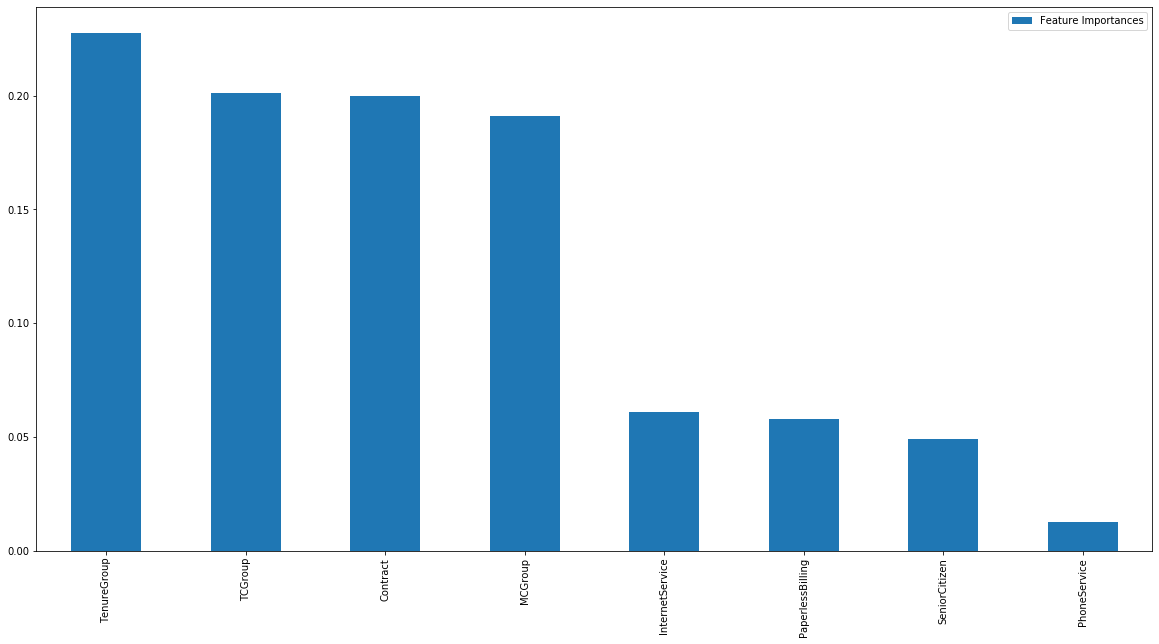

In [0]:
imp.sort_values(by='Feature Importances', ascending= False).plot(kind='bar', rot=90,figsize=(20, 10));



# Conclusion

*Based on your modeling and analysis, what recommendations would you be able to confidently give in order to prevent a customer from churning?*

The recommendations to prevent from a customer from churning are the following: 
- Make, meet or exceed customer expectations
- Turn weaknesses into strengths
- Offer more discounts for certain services and less tenured customers
- Emphasize on customers' complaints
- Assuming the customer has a good profile, if they are attempting to cancel, we should offer incentives for them to stay at least a few months 
- Improve communication skills with the customer(s)
- Look out for other competition and match or better their competitors' offer for that particular competition

*What you set out to do?*

If the duration of a customer staying with the company, the total and monthly charges paid by the customer, the type of the contract, internet service, phone service, and the preference of paperless billing for the customer and the customer's age would be good indicators of customer churning.

*What you learned along the way?*
I learned that just because customers take advantage of paperless billing and pay electronically can still mean they vote to churn. It's other factors that caused them to churn.

*What conclusions you were able to confidently come to?*
The tenure of the customer, the type of contract and the total/monthly charges of the customer predicts accurately when it comes to customer churning.
